<a href="https://colab.research.google.com/github/Stamby22/DSCZ9_final_project/blob/main/Butterflies_Austria_SDA_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SDA Butterflies classification


*   download data
*   gathering requirements
*   data visualization
*   data processing




## About Dataset

We use the dataset https://www.kaggle.com/datasets/chris565/butterflies-austria-20/code


This is the butterflies images Dataset.In this dataset there are 20 different species of butterflies living in Austria.

The dataset consits of over 7000 butterflies and every class consists of 300-500 species.

This Dataset consists of folder as butterflies and species csv file.

The butterflies folder further contains two folder: Train folder and val folder.

The Train and Val Folder further contains several folders of images.

There are 20 Number of files in Training Folder and 20 Number of Files in the Validation Folder.

## Imports

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


## Load data

### From Google Drive

In [ ]:
# propojit svůj Disk Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Spustit pouze poprvé !!
!unzip /content/drive/MyDrive/Datasets/Butterflies_Austria_20.zip -d /content/Datasets
#!unzip /content/drive/MyDrive/Datasets/Butterflies_Austria_7000.zip -d /content/Datasets

Archive:  /content/drive/MyDrive/Datasets/Butterflies_Austria_20.zip
   creating: /content/Datasets/Butterflies_Austria_20/
  inflating: /content/Datasets/Butterflies_Austria_20/species.csv  
  inflating: /content/Datasets/Butterflies_Austria_20/species_cname.csv  
   creating: /content/Datasets/Butterflies_Austria_20/train/
   creating: /content/Datasets/Butterflies_Austria_20/train/ad/
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-001.jpg  
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-002.jpg  
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-004.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-007.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-009.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-013.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-016.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_20/train/ad/ad-024.jp

In [ ]:
dataset_dir = "/content/Datasets/"
#dataset_dir = "/content/Datasets/ButterfliesAustria20/"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")

# Define the path to your dataset directory
# dataset_path = '/kaggle/input/butterflies-austria-20'

### From Local Directory

In [ ]:
current_working_directory = os.getcwd()
print(current_working_directory)

/content


In [ ]:
os.listdir()

['.config', 'drive', 'Datasets', 'sample_data']

In [ ]:
dataset_dir = "Datasets/Butterflies_Austria_20"
dataset_dir = os.path.join(current_working_directory, dataset_dir)

In [ ]:
os.listdir(dataset_dir)

['species.csv', 'val', 'train', 'species_cname.csv']

In [ ]:
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir,  "val")

## Zobrazení Species.csv

In [ ]:
df = pd.read_csv(os.path.join(dataset_dir, "species.csv"))
df

num  abk             gname                   latin
0     1   ad           Admiral        Vanessa Atalanta
1     2   ap            Apollo       Parnassius Apollo
2     3   af            Aurora  Anthocharis Cardamines
3     4   bl         Blaeuling              Lycaenidae
4     5   cf          C-Falter       Polygonia C-album
5     6   df      Distelfalter          Vanessa Cardui
6     7   po         Postilion        Colias Myrmidone
7     8   km      Kaisermantel         Argynnis Paphia
8     9   kf     kleiner Fuchs          Aglais Urticae
9    10   kw     Kohlweissling            Pieris Rapae
10   11   oa        Ochsenauge         Maniola Jurtina
11   12   sb       Schachbrett     Melanargia Galathea
12   13   sf    Schillerfalter            Apatura Iris
13   14   ss  Schwalbenschwanz         Papilio Machaon
14   15  sfa       Segelfalter    phiclides Podalirius
15   16   tf      Tagfauenauge              Inachis Io
16   17   tm      Trauermantel       Nymphalis Antiopa
17   18   zf    Zitronenfalter       Gonepteryx Rhamni
18   19   ol  Osterluzeifalter      Zerynthia Polyxena
19   20  dfa     Dukatenfalter      Lycaena Virgaureae

In [ ]:
dfcz = pd.read_csv(os.path.join(dataset_dir, "species_cname.csv"), encoding="cp1250")
dfcz#.head()

num  abk             gname                   latin  \
0     1   ad           Admiral        Vanessa Atalanta   
1     2   ap            Apollo       Parnassius Apollo   
2     3   af            Aurora  Anthocharis Cardamines   
3     4   bl         Blaeuling              Lycaenidae   
4     5   cf          C-Falter       Polygonia C-album   
5     6   df      Distelfalter          Vanessa Cardui   
6     7   po         Postilion        Colias Myrmidone   
7     8   km      Kaisermantel         Argynnis Paphia   
8     9   kf     kleiner Fuchs          Aglais Urticae   
9    10   kw     Kohlweissling            Pieris Rapae   
10   11   oa        Ochsenauge         Maniola Jurtina   
11   12   sb       Schachbrett     Melanargia Galathea   
12   13   sf    Schillerfalter            Apatura Iris   
13   14   ss  Schwalbenschwanz         Papilio Machaon   
14   15  sfa       Segelfalter   Iphiclides Podalirius   
15   16   tf      Tagfauenauge              Inachis Io   
16   17   tm      Trauermantel       Nymphalis Antiopa   
17   18   zf    Zitronenfalter       Gonepteryx Rhamni   
18   19   ol  Osterluzeifalter      Zerynthia Polyxena   
19   20  dfa     Dukatenfalter      Lycaena Virgaureae   

                       cname  
0            Babočka admirál  
1           Jasoň červenooký  
2          Bělásek řeřichový  
3               Modráskovití  
4             Babočka bílé C  
5          Babočka bodláková  
6        Žluťásek barvoměnný  
7    Perleťovec stříbropásek  
8          Babočka kopřivová  
9             Bělásek řepový  
10                Okáč luční  
11            Okáč bojínkový  
12            Batolec duhový  
13        Otakárek fenyklový  
14           Otakárek ovocný  
15          Babočka paví oko  
16           Babočka osiková  
17      Žluťásek řešetlákový  
18  Pestrokřídlec podražcový  
19        Ohniváček celíkový

In [ ]:
num_train_files = len(os.listdir(train_dir))
print(f"Number of files in the 'train' folder: {num_train_files}")

num_val_files = len(os.listdir(val_dir))
print(f"Number of files in the 'val' folder: {num_val_files}")

Number of files in the 'train' folder: 20
Number of files in the 'val' folder: 20


In [ ]:
os.listdir(train_dir)

['km',
 'tf',
 'df',
 'oa',
 'sfa',
 'sb',
 'kf',
 'ol',
 'kw',
 'po',
 'ss',
 'ad',
 'ap',
 'zf',
 'tm',
 'dfa',
 'bl',
 'sf',
 'af',
 'cf']

In [ ]:
# Count images per folder in training data
def count_images_per_folder(data_path):
    folders = os.listdir(data_path)
    folders.sort()
    folder_counts = {}
    for folder in folders:
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            folder_counts[folder] = num_images
    return folder_counts

# Vypíše počet obrázků v jednotlivých složkách train_dir
train_folder_counts = count_images_per_folder(train_dir)
print("Number of images in each folder of Training Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images, Druh: {dfcz[dfcz['abk'] == folder]['cname'].values[0]}")

Number of images in each folder of Training Data:
ad: 241 images, Druh: Babočka admirál
af: 280 images, Druh: Bělásek řeřichový
ap: 234 images, Druh: Jasoň červenooký
bl: 288 images, Druh: Modráskovití
cf: 286 images, Druh: Babočka bílé C
df: 214 images, Druh: Babočka bodláková
dfa: 157 images, Druh: Ohniváček celíkový
kf: 199 images, Druh: Babočka kopřivová
km: 240 images, Druh: Perleťovec stříbropásek
kw: 241 images, Druh: Bělásek řepový
oa: 278 images, Druh: Okáč luční
ol: 204 images, Druh: Pestrokřídlec podražcový
po: 208 images, Druh: Žluťásek barvoměnný
sb: 257 images, Druh: Okáč bojínkový
sf: 270 images, Druh: Batolec duhový
sfa: 211 images, Druh: Otakárek ovocný
ss: 190 images, Druh: Otakárek fenyklový
tf: 178 images, Druh: Babočka paví oko
tm: 147 images, Druh: Babočka osiková
zf: 151 images, Druh: Žluťásek řešetlákový


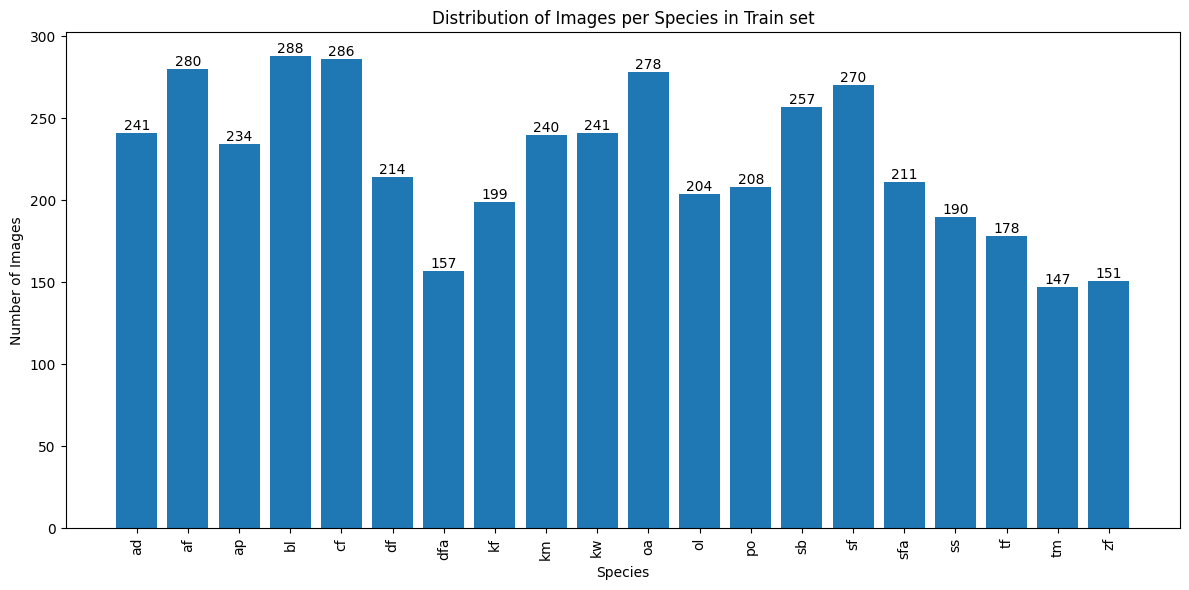

In [ ]:
# Barplot of number of images for each species - train set

# Get the counts of images in each folder
train_folder_counts = count_images_per_folder(train_dir)

# Extract folder names and counts
folders = list(train_folder_counts.keys())
counts = list(train_folder_counts.values())

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(folders, counts)
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Species in Train set")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Vypíše počet obrázků v jednotlivých složkách val_dir
train_folder_counts = count_images_per_folder(val_dir)
print("\nNumber of images in each folder of Validation Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images, Druh: {dfcz[dfcz['abk'] == folder]['cname'].values[0]}")


Number of images in each folder of Validation Data:
ad: 12 images, Druh: Babočka admirál
af: 17 images, Druh: Bělásek řeřichový
ap: 13 images, Druh: Jasoň červenooký
bl: 16 images, Druh: Modráskovití
cf: 13 images, Druh: Babočka bílé C
df: 17 images, Druh: Babočka bodláková
dfa: 13 images, Druh: Ohniváček celíkový
kf: 15 images, Druh: Babočka kopřivová
km: 13 images, Druh: Perleťovec stříbropásek
kw: 11 images, Druh: Bělásek řepový
oa: 13 images, Druh: Okáč luční
ol: 22 images, Druh: Pestrokřídlec podražcový
po: 12 images, Druh: Žluťásek barvoměnný
sb: 13 images, Druh: Okáč bojínkový
sf: 11 images, Druh: Batolec duhový
sfa: 14 images, Druh: Otakárek ovocný
ss: 9 images, Druh: Otakárek fenyklový
tf: 15 images, Druh: Babočka paví oko
tm: 13 images, Druh: Babočka osiková
zf: 15 images, Druh: Žluťásek řešetlákový


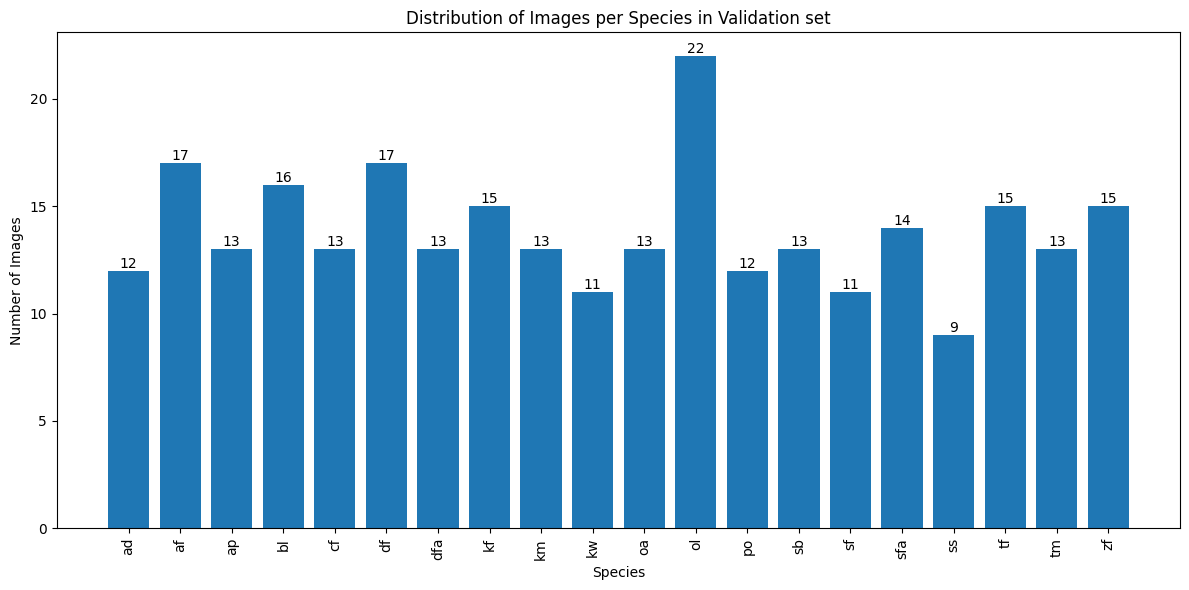

In [ ]:
# Barplot of number of images for each species - validation set

# Get the counts of images in each folder
train_folder_counts = count_images_per_folder(val_dir)

# Extract folder names and counts
folders = list(train_folder_counts.keys())
counts = list(train_folder_counts.values())

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(folders, counts)
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Species in Validation set")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Show images

In [ ]:
# Functions definitons

In [ ]:
def display_image(image_path, title=""):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

def display_images_with_titles(image_paths, titles):
    fig, ax = plt.subplots(5, 5, figsize=(30, 25))
    for i, image_path in enumerate(image_paths):
        row = i // 5
        col = i % 5
        image = Image.open(image_path)
        image = image.resize(size=(140, 140))
        ax[row, col].imshow(image)
        ax[row, col].axis('off')
        ax[row, col].set_title(titles[i])
    plt.tight_layout()
    plt.show()

def display_images_with_titles_II(image_paths, titles):
    """
    Displays multiple images with titles in a single plot.

    Args:
        image_paths: A list of paths to the images.
        titles: A list of titles corresponding to the images.
    """
    num_images = len(image_paths)
    fig, axes = plt.subplots(4, 5, figsize=(15, 15))  # Adjust figsize as needed

    for i in range(num_images):
        row = i // 5
        col = i % 5
        image = plt.imread(image_paths[i])
        axes[row, col].imshow(image)
        axes[row, col].set_title(titles[i])
        axes[row, col].axis('off')  # Remove axis labels

    plt.tight_layout()
    plt.show()

def display_images_with_titles_III(image_paths, titles):
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    for i, image_path in enumerate(image_paths):
        row = i // 5
        col = i % 5
        image = Image.open(image_path)
        ax[row, col].imshow(image)
        ax[row, col].axis('off')
        ax[row, col].set_title(titles[i])
    plt.tight_layout()
    plt.show()

In [ ]:
# Zobrazení prvních 10 obrázků prvního druhu

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for i, image_file in enumerate(image_files):
        if train_images_displayed < 10:
            image_path = os.path.join(folder_path, image_file)
            train_image_paths.append(image_path)
            train_image_titles.append(f"Folder: {folder}")
            train_images_displayed += 1
        else:
            break

print(f"Number of images displayed: prvních {train_images_displayed}")
display_images_with_titles_III(train_image_paths, train_image_titles)

In [ ]:
# Zobrazení prvních 25 obrázků všech druhů

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    train_image_paths = []
    train_image_titles = []
    train_images_displayed = 0
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    image_files.sort()
    for i, image_file in enumerate(image_files[:25]):
        image_path = os.path.join(folder_path, image_file)
        train_image_paths.append(image_path)
        train_image_titles.append(f"{folder}-{image_file}")
        train_images_displayed += 1

    print(f"Number of images displayed: prvních {train_images_displayed}")
    display_images_with_titles(train_image_paths, train_image_titles)


 Images of each Folder of Training Data:


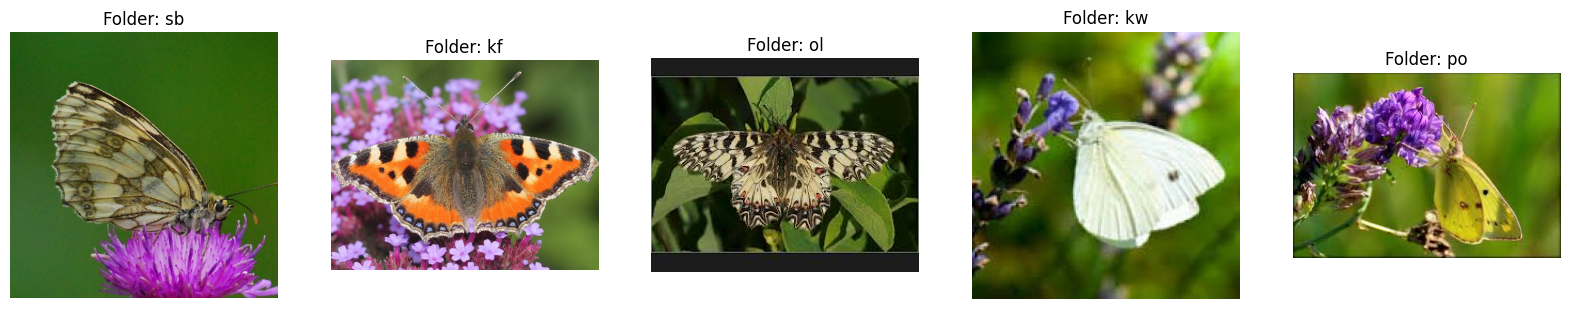


 Images of each folder of Validation Data:


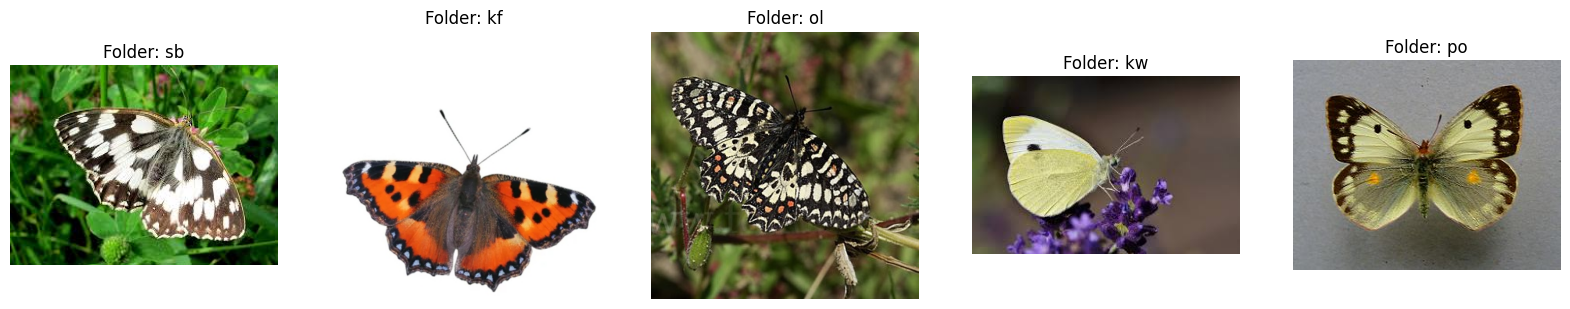

In [ ]:
# Function to print bold headings
def print_bold_heading(heading):
    print(f"\n \033[1m{heading}:\033[0m")

# Display 10 images from each folder in the train folder
print_bold_heading("Images of each Folder of Training Data")
train_folders = os.listdir(train_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(train_folders[:10]):
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

# Display 10 images from each folder in the validation folder
print_bold_heading("Images of each folder of Validation Data")
val_folders = os.listdir(val_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(val_folders[:10]):
    folder_path = os.path.join(val_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

In [ ]:
# Print first image from each folder in train_folders with Species name

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    if image_files:
        image_path = os.path.join(folder_path, image_files[0])
        train_image_paths.append(image_path)
        train_image_titles.append(f"Species: {dfcz[dfcz['abk'] == folder]['cname'].values[0]}")
        train_images_displayed += 1

print(f"Number of Species: {train_images_displayed}")
display_images_with_titles_II(train_image_paths, train_image_titles)

## Models

In [ ]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[5,3])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
    plt.xlabel('Epochs',fontsize=16)
    plt.xticks(range(epochs))
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[5,3])

    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
    plt.xlabel('Epochs',fontsize=16)
    plt.xticks(range(epochs))
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

def plot_results(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    min_val_loss = min(history.history['val_loss'])
    min_val_loss_idx = np.argmin(history.history['val_loss'])
    plt.axhline(min_val_loss, color='red', linestyle='dashed')
    plt.plot(
        min_val_loss_idx,
        min_val_loss,
        'ro',
        label=f'epoch: {min_val_loss_idx}'
    )

    plt.xlabel('Epoch Number')
    plt.ylabel("Loss Magnitude")
    plt.legend()
    plt.show()

### ImageDataGenerator

#### MobilenetV2, 224, 10

In [ ]:
IM_SIZE = 224

In [ ]:
# Load species CSV
df = dfcz
dfcz.head()

num abk      gname                   latin              cname
0    1  ad    Admiral        Vanessa Atalanta    Babočka admirál
1    2  ap     Apollo       Parnassius Apollo   Jasoň červenooký
2    3  af     Aurora  Anthocharis Cardamines  Bělásek řeřichový
3    4  bl  Blaeuling              Lycaenidae       Modráskovití
4    5  cf   C-Falter       Polygonia C-album     Babočka bílé C

In [ ]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_SIZE, IM_SIZE),
        batch_size=256,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_SIZE, IM_SIZE),
        batch_size=256,
        class_mode='categorical')

Found 4474 images belonging to 20 classes.
Found 277 images belonging to 20 classes.


In [ ]:
# Load pre-trained MobileNetV2 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_SIZE, IM_SIZE, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_SIZE, IM_SIZE, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'), #Dense(1024
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
epochs = 3

In [ ]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 324s 17s/step - accuracy: 0.4505 - loss: 2.5117 - val_accuracy: 0.8592 - val_loss: 0.4813
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 264s 14s/step - accuracy: 0.9679 - loss: 0.1301 - val_accuracy: 0.9134 - val_loss: 0.2501
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 327s 15s/step - accuracy: 0.9968 - loss: 0.0216 - val_accuracy: 0.9458 - val_loss: 0.2246
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 782ms/step - accuracy: 0.9470 - loss: 0.2192
Validation Accuracy: 0.9458483457565308


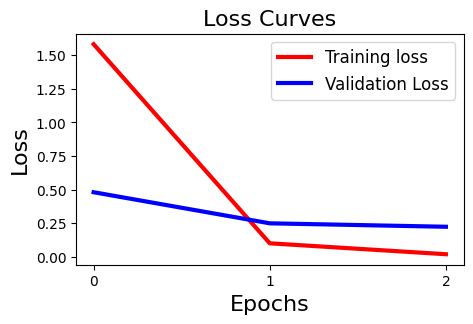

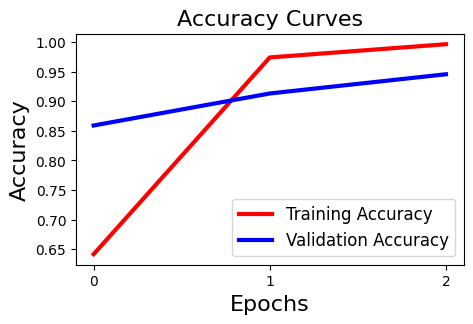

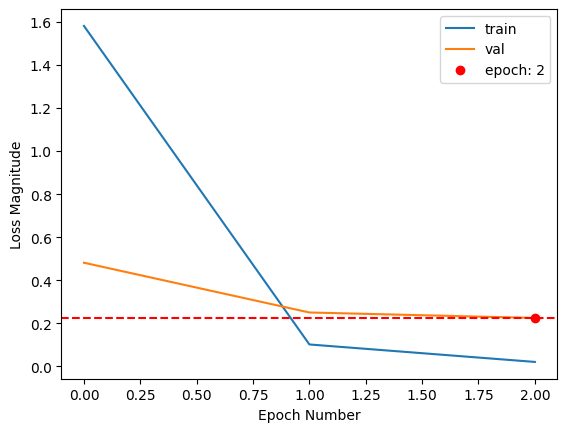

In [ ]:
plot_history(history)
plot_results(history)

##### Confusion Matrix

test loss, test acc: [0.22459609806537628, 0.9458483457565308]
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


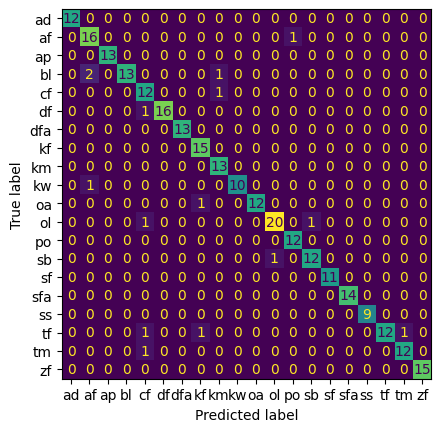

In [ ]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

# get all images and labels in iterations
val_images = []
val_labels = []

for i in range( val_generator.__len__() ):
    val_images.extend(val_generator.__getitem__( i )[0])
    val_labels.extend(val_generator.__getitem__( i )[1])

val_images = np.array(val_images)

# get predictions
model_labels = model.predict(val_images)

pred_labels = np.argmax(model_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
class_list = list(class_indices.keys())
class_indices_cnames = {dfcz[dfcz['abk'] == k]['cname'].values[0]: v for k, v in class_indices.items()}

# confusion matrix
cm = confusion_matrix(true_labels.tolist(), pred_labels.tolist())
ConfusionMatrixDisplay(cm, display_labels=class_indices_cnames).plot(include_values=True, colorbar=False, values_format = ".0f", xticks_rotation="vertical", cmap="viridis")
plt.show()

In [ ]:
print("Classification report for CNN :\n%s\n"% (metrics.classification_report(true_labels, pred_labels,target_names=class_indices_cnames.keys())))

##### Save model


In [ ]:
model.save("/content/drive/MyDrive/Datasets/Butterflies_MobileNetV2_E5_D1024.keras")

##### Show wrong predictions

In [ ]:
# Functions for display images
def get_cz_class_name(pred):
  label = class_names[pred]
  return dfcz[dfcz['abk'] == label]["cname"].values[0]

def display_images_grid_nparray(images_np, titles_im):
  # images_np is array of selected images
  # titles is list of titles selected images
  cols = 5 # Number of columns in grid
  # Calculate the number of rows needed
  rows = len(images_np) // cols + (len(images_np) % cols > 0)
  fig, axes = plt.subplots(rows, cols, figsize=(10, round(rows * 2.5)))
  for i, ax in enumerate(axes.flat):
      if i < len(images_np):
          ax.imshow(images_np[i], cmap='gray')
          ax.set_title(titles_im[i], fontsize = 8)
          ax.axis('off')
      else:
          ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
# get probabilities of the best predictions
def get_probabilities(ind, num_best):
  prob_list = model_labels[ind]
  prob_dict = {}
  i = 0
  for prob in prob_list:
    prob_dict[round(100*prob)] = get_cz_class_name(i)
    i += 1
  myKeys = list(prob_dict.keys())
  myKeys.sort(reverse = True)
  myKeys = myKeys[:num_best]

  sorted_list = [str(i)+'% '+ prob_dict[i] for i in myKeys]

  return sorted_list

In [ ]:
probabilities = get_probabilities(49, 2)
print(probabilities)


['51% Perleťovec stříbropásek', '22% Modráskovití']


Number of false predictions: 15



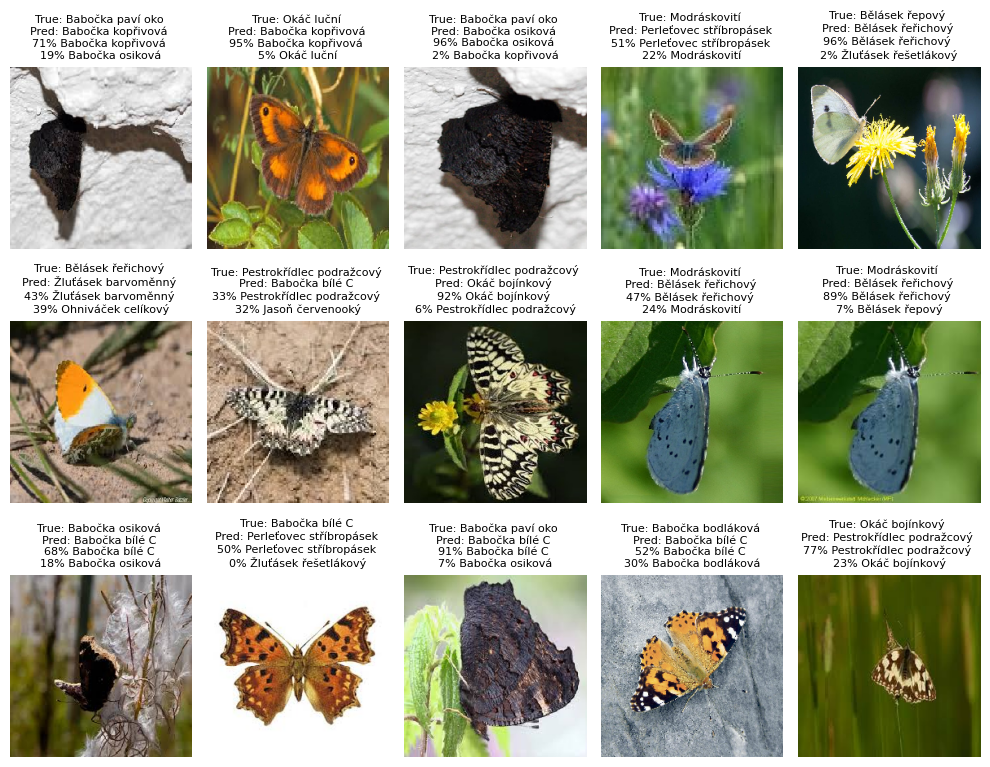

In [ ]:
# display false prediction image
count_false_pred = 0
images_np = np.empty((0, IM_SIZE, IM_SIZE, 3), dtype=np.uint8)
titles_im = np.empty((0))
for i in range(len(true_labels)):
  if true_labels[i] != pred_labels[i]:
    count_false_pred += 1
    images_np = np.append(images_np, np.expand_dims(val_images[i], axis=0), axis=0)
    true_name = get_cz_class_name(true_labels[i])
    pred_name = get_cz_class_name(pred_labels[i])
    prob_text1 = get_probabilities(i, 2)[0]
    prob_text2 = get_probabilities(i, 2)[1]

    titles_im = np.append(titles_im, (f"True: {true_name} \nPred: {pred_name} \n{prob_text1} \n{prob_text2}"))

print(f"Number of false predictions: {count_false_pred}\n")
display_images_grid_nparray(images_np, titles_im)

##### Show all prediction of validation class

In [ ]:
def display_selected_class_images(selected_class_label):
  count_false_pred = 0
  images_np = np.empty((0, IM_SIZE, IM_SIZE, 3), dtype=np.uint8)
  titles_im = np.empty((0))
  #count_figure = 0
  for i in range(len(true_labels)):
    if true_labels[i] == selected_class_label:
      if true_labels[i] != pred_labels[i]:
        count_false_pred += 1

      images_np = np.append(images_np, np.expand_dims(val_images[i], axis=0), axis=0)
      true_name = get_cz_class_name(true_labels[i])
      pred_name = get_cz_class_name(pred_labels[i])
      titles_im = np.append(titles_im, (f"True: {true_name} \nPred: {pred_name}"))

  print(f"Number of false prediction for {selected_class_name}: {count_false_pred}\n")
  display_images_grid_nparray(images_np, titles_im)

Number of false prediction for Bělásek řeřichový: 1



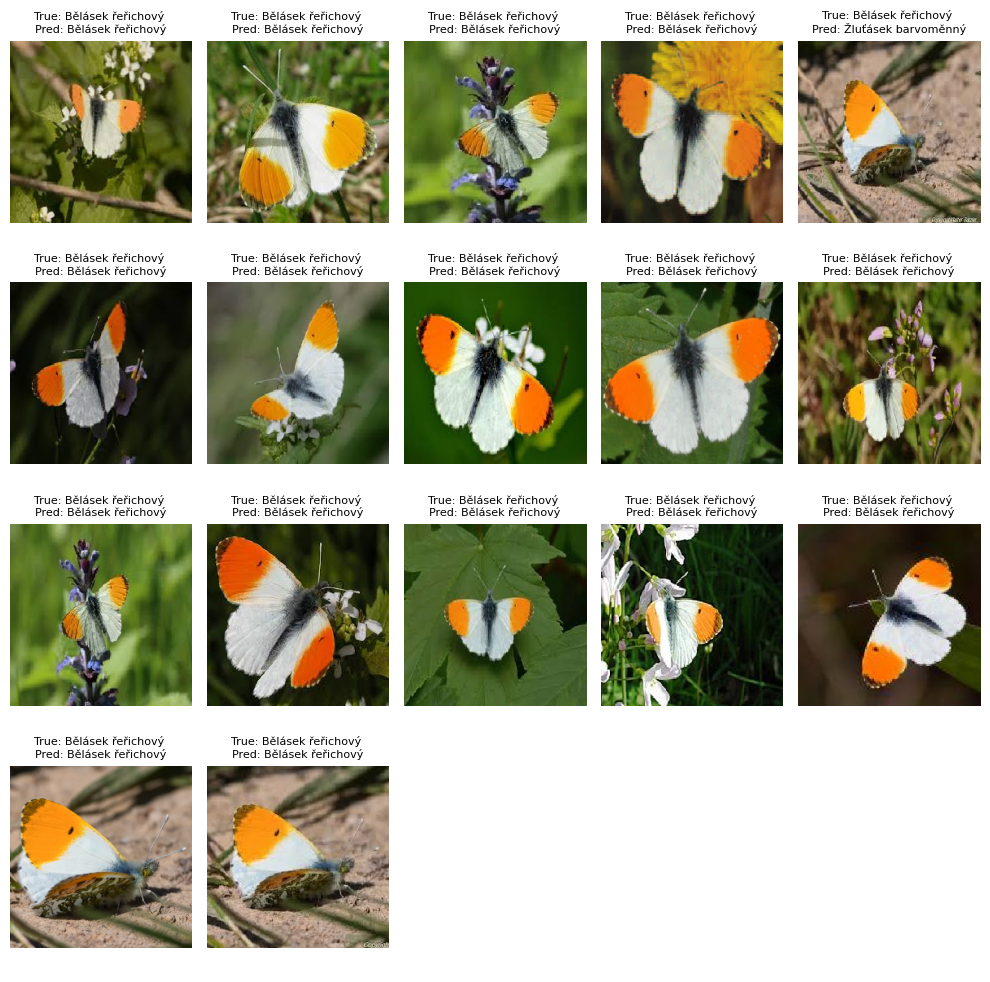

In [ ]:
#@title Class Selection (choose class name and execute the cell!) { display-mode: "form"}
selected_class_name = "Bělásek řeřichový" # @param ["Babočka admirál", "Babočka bílé C", "Babočka bodláková", "Babočka kopřivová", "Babočka osiková", "Babočka paví oko", "Batolec duhový", "Bělásek řepový", "Bělásek řeřichový", "Jasoň červenooký", "Modráskovití", "Ohniváček celíkový", "Okáč bojínkový", "Okáč luční", "Otakárek fenyklový", "Otakárek ovocný", "Perleťovec stříbropásek", "Pestrokřídlec podražcový", "Žluťásek barvoměnný", "Žluťásek řešetlákový"]

selected_class_label = class_indices[dfcz[dfcz['cname'] == selected_class_name]["abk"].values[0]]
display_selected_class_images(selected_class_label)

##### Resize validation set to 1:1 and make new prediction

In [ ]:
def image_resize_with_padding(img_path, img_path_save, borderType='C',
                              value=((0,0,0))):
  # img_path = pathname of image
  # img_path_save = pathname for save of resized image
  # Načtení obrázku
  image = cv2.imread(img_path)

  # Získání rozměrů obrázku
  height, width = image.shape[:2]

  # Výpočet rozdílu mezi šířkou a výškou
  if width > height:
      padding = (width - height) // 2
      if borderType == 'C':
        padded_image = cv2.copyMakeBorder(image, padding, padding, 0, 0,
                                          borderType=cv2.BORDER_CONSTANT, value=value)
      else:
        padded_image = cv2.copyMakeBorder(image, padding, padding, 0, 0,
                                          cv2.BORDER_REPLICATE)
  else:
      padding = (height - width) // 2
      if borderType == 'C':
        padded_image = cv2.copyMakeBorder(image, 0, 0, padding, padding,
                                          borderType=cv2.BORDER_CONSTANT, value=value)
      else:
        padded_image = cv2.copyMakeBorder(image, 0, 0, padding, padding,
                                          cv2.BORDER_REPLICATE)

  # Změna velikosti na 1:1
  desired_size = max(height, width)
  resized_image = cv2.resize(padded_image, (desired_size, desired_size))

  # Uložení výsledného obrázku
  cv2.imwrite(img_path_save, resized_image)


In [ ]:
# Function for creating new folder with all files resized to ratio 1:1
def create_new_resized_folder(data_path, new_data_path,
                              borderType='C', value=(0,0,0)):
  if not os.path.isdir(new_data_path):
    os.mkdir(new_data_path)
  folders = os.listdir(data_path)
  folders.sort()
  for folder in folders:
      folder_path = os.path.join(data_path, folder)
      new_folder_path = os.path.join(new_data_path, folder)
      if not os.path.isdir(new_folder_path):
        os.mkdir(new_folder_path)
      if os.path.isdir(folder_path):
          files_list = os.listdir(folder_path)
          files_list.sort()
          for img_file in files_list:
            img_path = os.path.join(folder_path, img_file)
            img_path_save = os.path.join(new_folder_path, img_file)
            image_resize_with_padding(img_path, img_path_save, borderType, value)
            print(f"Created file: {img_path_save}")

In [ ]:
# Create new dataset with images resized to ratio 1:1
new_dataset_dir = os.path.join(current_working_directory, "Datasets/Butterflies_resized")
if not os.path.isdir(new_dataset_dir):
  os.mkdir(new_dataset_dir)
#
new_train_dir = os.path.join(new_dataset_dir, "train")
new_val_dir = os.path.join(new_dataset_dir,  "val")
if not os.path.isdir(new_train_dir):
  os.mkdir(new_train_dir)
if not os.path.isdir(new_val_dir):
  os.mkdir(new_val_dir)

create_new_resized_folder(train_dir, new_train_dir, 'B')
create_new_resized_folder(val_dir, new_val_dir, 'B')

In [ ]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        new_train_dir,
        target_size=(IM_SIZE, IM_SIZE),
        batch_size=256,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        new_val_dir,
        target_size=(IM_SIZE, IM_SIZE),
        batch_size=256,
        class_mode='categorical')

In [ ]:
#loaded_model = load_model("/content/drive/MyDrive/Datasets/Butterflies_MobileNetV2_E5_D1024.keras")

In [ ]:
# Load pre-trained MobileNetV2 model without the top (fully connected) layers
##base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_SIZE, IM_SIZE, 3))

# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model_res = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model_res.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

epochs = 3

# Train the model with early stopping
history = model_res.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model_res.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

In [ ]:
# get all images and labels in iterations
val_images = []
val_labels = []

for i in range( val_generator.__len__() ):
    val_images.extend(val_generator.__getitem__( i )[0])
    val_labels.extend(val_generator.__getitem__( i )[1])

val_images = np.array(val_images)

# get predictions
model_labels = model_res.predict(val_images)
pred_labels = np.argmax(model_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
class_list = list(class_indices.keys())
# confusion matrix
cm = confusion_matrix(true_labels.tolist(), pred_labels.tolist())
ConfusionMatrixDisplay(cm, display_labels=class_indices).plot(include_values=True, colorbar=False, values_format = ".0f")
plt.show()

#### Model2

In [ ]:
# model

#### Model3

In [ ]:
# model

In [ ]:
model.summary()

## Predict name of an user butterfly foto

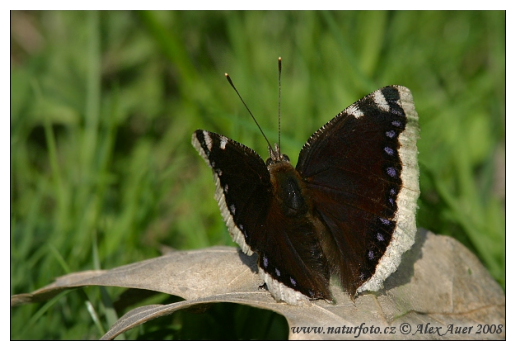

In [ ]:
user_image_path_name = "babocka-osikova 1.jpg"
img = Image.open(user_image_path_name)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
# resize image to proper size
img_sample = img.resize((IM_SIZE,IM_SIZE))
img_sample = tf.keras.utils.img_to_array(img_sample)   #np.array(img_sample)
img_sample = img_sample/255

In [ ]:
# add first dimension for model
img_sample_norm = np.expand_dims(img_sample, axis=0)
# predict class
img_pred = np.argmax(model.predict(img_sample_norm, verbose=0), axis=1)
print(f"Predikovaný druh: {get_cz_class_name(img_pred[0])}")


Predikovaný druh: Babočka osiková


## Resize image to format 1:1 with padding

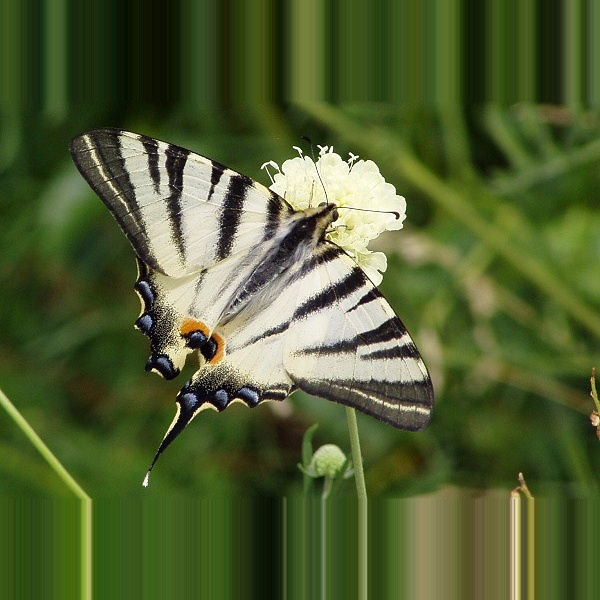

In [ ]:
img_path = "otakarek-ovocny3.jpg"

img_path_save = ''.join(img_path.split(".")[:-1])+"_resized."+img_path.split(".")[-1]
image_resize_with_padding(img_path, img_path_save, 'B')
image = cv2.imread(img_path_save)
cv2_imshow(image)

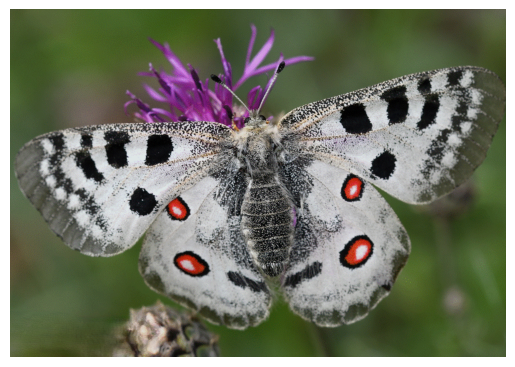

In [ ]:
img = Image.open("jasoň 1.gif")
plt.imshow(img)
plt.axis('off')
plt.show()
#img.save("jason cervenooky 1.jpg")